In [1]:
%cd /mnt/i/Yuki/workspace/exercises/image_processing_100_knock/Gasyori100knock

/mnt/i/Yuki/workspace/exercises/image_processing_100_knock/Gasyori100knock


https://github.com/yoyoyo-yo/Gasyori100knock/tree/master/Question_51_60

# 準備

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
imori_img_path = 'Question_51_60/imori.jpg'
imori_img = cv2.imread(imori_img_path)

imori_part_img_path = 'Question_51_60/imori_part.jpg'
imori_part_img = cv2.imread(imori_part_img_path)

seg_img_path = 'Question_51_60/seg.png'
seg_img = cv2.imread(seg_img_path, cv2.IMREAD_GRAYSCALE)

thorino_img_path = 'Question_51_60/thorino.jpg'
thorino_img = cv2.imread(thorino_img_path)

## OpenCV は BGR を採用しているので RGB に変換する
BGR を採用している理由は単なる歴史的経緯らしい

In [4]:
imori_img = imori_img[:, :, ::-1]
imori_part_img = imori_part_img[:, :, ::-1]
seg_img = seg_img[:, :]
thorino_img = thorino_img[:, :, ::-1]

# Utility Function

In [5]:
def get_ootsu_threshold(lum):
    best_score = None
    best_thre = None
    for i in range(256):
        w1 = np.sum(lum < i)
        w2 = np.sum(lum >= i)
        m1 = np.sum(lum[lum < i]) / (w1 + 1e-18)
        m2 = np.sum(lum[lum >= i]) / (w2 + 1e-18)
        score = w1 * w2 * (m1 - m2) ** 2
        if best_score is None or best_score < score:
            best_score = score
            best_thre = i
    
    return best_thre

In [6]:
def dilation(img):
    padded = np.pad(img, (1, 1), 'edge')
    filt = np.array([
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0],
    ])
    
    ans = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if np.sum(padded[i:i+3, j:j+3] * filt) >= 255:
                ans[i, j] = 255

    return ans

In [7]:
def erosion(img):
    padded = np.pad(img, (1, 1), 'edge')
    filt = np.array([
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0],
    ])
    
    ans = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if np.sum(padded[i:i+3, j:j+3] * filt) < 255 * 4:
                ans[i, j] = 0

    return ans

# 問題

## Q.51. モルフォロジー勾配

In [8]:
ootsu = imori_img.copy()
ootsu = ootsu[:, :, 0] * 0.2126 + ootsu[:, :, 1] * 0.7152 + ootsu[:, :, 2] * 0.0722
ootsu = ootsu.astype(np.uint8)

best_thre = get_ootsu_threshold(ootsu)

ootsu[ootsu < best_thre] = 0
ootsu[ootsu >= best_thre] = 255

diff = dilation(ootsu) - erosion(ootsu)

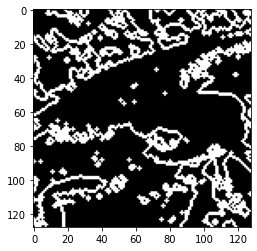

In [9]:
plt.imshow(diff, cmap='gray')

## Q.52. トップハット変換

In [10]:
ootsu = imori_img.copy()
ootsu = ootsu[:, :, 0] * 0.2126 + ootsu[:, :, 1] * 0.7152 + ootsu[:, :, 2] * 0.0722
ootsu = ootsu.astype(np.uint8)

best_thre = get_ootsu_threshold(ootsu)

ootsu[ootsu < best_thre] = 0
ootsu[ootsu >= best_thre] = 255

N = 2
processed = ootsu.copy()
for _ in range(N):
    processed = erosion(processed)
for _ in range(N):
    processed = dilation(processed)

diff = ootsu - processed

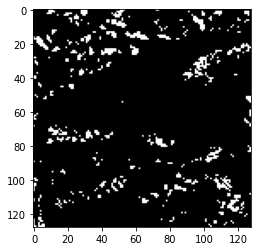

In [11]:
plt.imshow(diff, cmap='gray')

## Q.53. ブラックハット変換

In [12]:
ootsu = imori_img.copy()
ootsu = ootsu[:, :, 0] * 0.2126 + ootsu[:, :, 1] * 0.7152 + ootsu[:, :, 2] * 0.0722
ootsu = ootsu.astype(np.uint8)

best_thre = get_ootsu_threshold(ootsu)

ootsu[ootsu < best_thre] = 0
ootsu[ootsu >= best_thre] = 255

N = 3
processed = ootsu.copy()
for _ in range(N):
    processed = dilation(processed)
for _ in range(N):
    processed = erosion(processed)

diff = processed - ootsu
diff[diff != 0] = 255

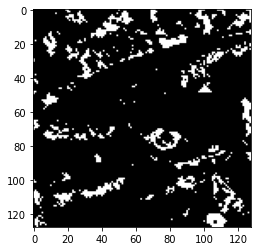

In [13]:
plt.imshow(diff, cmap='gray')

## Q.54. テンプレートマッチング SSD

In [14]:
orig = imori_img.copy().astype(np.float32)
part = imori_part_img.copy().astype(np.float32)

W, H = orig.shape[:2]
w, h = part.shape[:2]

best_s = None
for i in range(H - h):
    for j in range(W - w):
        s = np.sum((orig[i:i+h, j:j+w] - part) ** 2)
        if best_s is None or best_s > s:
            best_s = s
            best_i = i
            best_j = j

match = imori_img.copy()
match[best_i:best_i+h, best_j] = [255, 0, 0]
match[best_i:best_i+h, best_j+w] = [255, 0, 0]
match[best_i, best_j:best_j+w] = [255, 0, 0]
match[best_i+h, best_j:best_j+w] = [255, 0, 0]

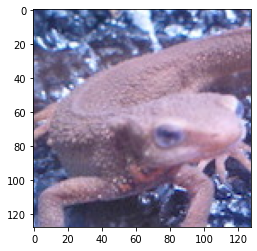

In [15]:
plt.imshow(imori_img)

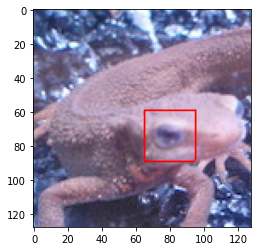

In [16]:
plt.imshow(match)

## Q.55. テンプレートマッチング SAD

In [17]:
orig = imori_img.copy().astype(np.float32)
part = imori_part_img.copy().astype(np.float32)

W, H = orig.shape[:2]
w, h = part.shape[:2]

best_s = None
for i in range(H - h):
    for j in range(W - w):
        s = np.sum(np.abs(orig[i:i+h, j:j+w] - part))
        if best_s is None or best_s > s:
            best_s = s
            best_i = i
            best_j = j

match = imori_img.copy()
match[best_i:best_i+h, best_j] = [255, 0, 0]
match[best_i:best_i+h, best_j+w] = [255, 0, 0]
match[best_i, best_j:best_j+w] = [255, 0, 0]
match[best_i+h, best_j:best_j+w] = [255, 0, 0]

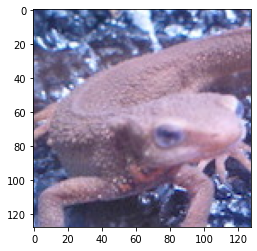

In [18]:
plt.imshow(imori_img)

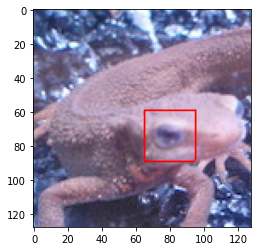

In [19]:
plt.imshow(match)

## Q.56. テンプレートマッチング NCC

In [20]:
orig = imori_img.copy().astype(np.float32)
part = imori_part_img.copy().astype(np.float32)

W, H = orig.shape[:2]
w, h = part.shape[:2]

best_s = None
for i in range(H - h):
    for j in range(W - w):
        s = np.sum(orig[i:i+h, j:j+w] * part) / np.sum(orig[i:i+h, j:j+w] ** 2) ** 0.5 / np.sum(part ** 2) ** 0.5
        if best_s is None or best_s < s:
            best_s = s
            best_i = i
            best_j = j

match = imori_img.copy()
match[best_i:best_i+h, best_j] = [255, 0, 0]
match[best_i:best_i+h, best_j+w] = [255, 0, 0]
match[best_i, best_j:best_j+w] = [255, 0, 0]
match[best_i+h, best_j:best_j+w] = [255, 0, 0]

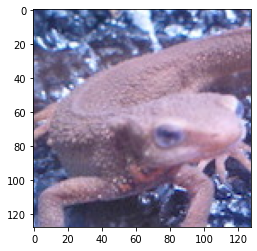

In [21]:
plt.imshow(imori_img)

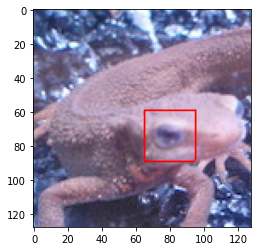

In [22]:
plt.imshow(match)

## Q.57. テンプレートマッチング ZNCC

In [23]:
orig = imori_img.copy().astype(np.float32)
part = imori_part_img.copy().astype(np.float32)

W, H = orig.shape[:2]
w, h = part.shape[:2]


best_s = None
for i in range(H - h):
    for j in range(W - w):
        m_orig = np.mean(orig[i:i+h, j:j+w], axis=(0, 1))
        m_part = np.mean(part, axis=(0, 1))

        s = np.sum((orig[i:i+h, j:j+w] - m_orig) * (part - m_part)) / np.sqrt(np.sum((orig[i:i+h, j:j+w] - m_orig) ** 2)) / np.sqrt(np.sum((part - m_part) ** 2))
        if best_s is None or best_s < s:
            best_s = s
            best_i = i
            best_j = j

match = imori_img.copy()
match[best_i:best_i+h, best_j] = [255, 0, 0]
match[best_i:best_i+h, best_j+w] = [255, 0, 0]
match[best_i, best_j:best_j+w] = [255, 0, 0]
match[best_i+h, best_j:best_j+w] = [255, 0, 0]

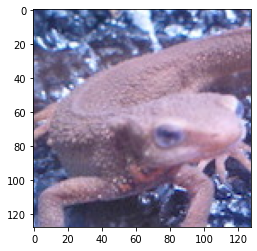

In [24]:
plt.imshow(imori_img)

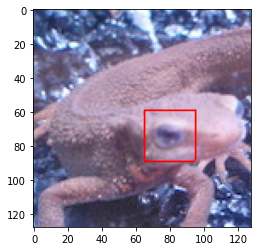

In [25]:
plt.imshow(match)

## Q.58. ラベリング 4近傍

In [26]:
orig = seg_img.copy()

src_to_dst = {}
src_count = 1

# ラスタスキャン
for i in range(orig.shape[0]):
    for j in range(orig.shape[1]):
        if orig[i, j] == 0:
            continue

        pairs = []
        if i - 1 >= 0 and orig[i - 1, j] != 0:
            src = orig[i - 1, j]
            pairs.append((src, src_to_dst[src]))
        if j - 1 >= 0 and orig[i, j - 1] != 0:
            src = orig[i, j - 1]
            pairs.append((src, src_to_dst[src]))

        if not pairs:
            orig[i, j] = src_count
            src_to_dst[src_count] = src_count
            src_count += 1
        else:
            min_dst = np.min([dst for _, dst in pairs])
            for src, _ in pairs:
                src_to_dst[src] = min_dst
                orig[i, j] = src

In [27]:
dsts = sorted(list(set(src_to_dst.values())))
dst_to_normalized = dict([(dst, i + 1) for i, dst in enumerate(dsts)])
for src in src_to_dst:
    normalized = dst_to_normalized[src_to_dst[src]]
    src_to_dst[src] = normalized

In [28]:
dst_set = set()
for i in range(orig.shape[0]):
    for j in range(orig.shape[1]):
        if orig[i, j] == 0:
            continue

        src = orig[i, j]
        orig[i, j] = src_to_dst[src]

In [29]:
colored = np.zeros((*orig.shape, 3)).astype(np.uint8)
colored[orig == 1] = [255, 0, 0]
colored[orig == 2] = [0, 255, 0]
colored[orig == 3] = [0, 0, 255]
colored[orig == 4] = [255, 255, 0]

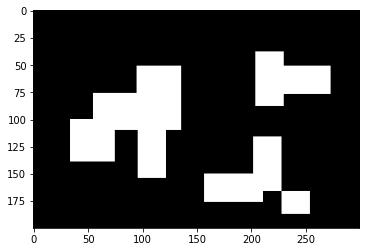

In [30]:
plt.imshow(seg_img, cmap='gray')

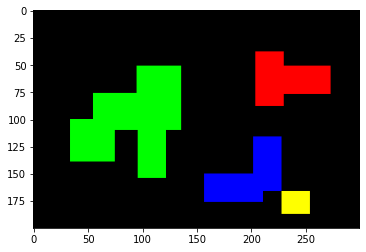

In [31]:
plt.imshow(colored)

## Q.59. ラベリング 8近傍

In [32]:
orig = seg_img.copy()

src_to_dst = {}
src_count = 1

# ラスタスキャン
for i in range(orig.shape[0]):
    for j in range(orig.shape[1]):
        if orig[i, j] == 0:
            continue

        pairs = []
        if i - 1 >= 0 and j - 1 >= 0 and orig[i - 1, j - 1] != 0:
            src = orig[i - 1, j - 1]
            pairs.append((src, src_to_dst[src]))
        if i - 1 >= 0 and orig[i - 1, j] != 0:
            src = orig[i - 1, j]
            pairs.append((src, src_to_dst[src]))
        if i - 1 >= 0 and j + 1 < orig.shape[1] and orig[i - 1, j + 1] != 0:
            src = orig[i - 1, j + 1]
            pairs.append((src, src_to_dst[src]))
        if j - 1 >= 0 and orig[i, j - 1] != 0:
            src = orig[i, j - 1]
            pairs.append((src, src_to_dst[src]))

        if not pairs:
            orig[i, j] = src_count
            src_to_dst[src_count] = src_count
            src_count += 1
        else:
            min_dst = np.min([dst for _, dst in pairs])
            for src, _ in pairs:
                src_to_dst[src] = min_dst
                orig[i, j] = src

In [33]:
dsts = sorted(list(set(src_to_dst.values())))
dst_to_normalized = dict([(dst, i + 1) for i, dst in enumerate(dsts)])
for src in src_to_dst:
    normalized = dst_to_normalized[src_to_dst[src]]
    src_to_dst[src] = normalized

In [34]:
dst_set = set()
for i in range(orig.shape[0]):
    for j in range(orig.shape[1]):
        if orig[i, j] == 0:
            continue

        src = orig[i, j]
        orig[i, j] = src_to_dst[src]

In [35]:
colored = np.zeros((*orig.shape, 3)).astype(np.uint8)
colored[orig == 1] = [255, 0, 0]
colored[orig == 2] = [0, 255, 0]
colored[orig == 3] = [0, 0, 255]
colored[orig == 4] = [255, 255, 0]

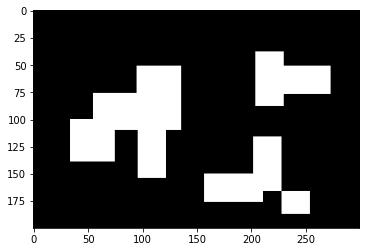

In [36]:
plt.imshow(seg_img, cmap='gray')

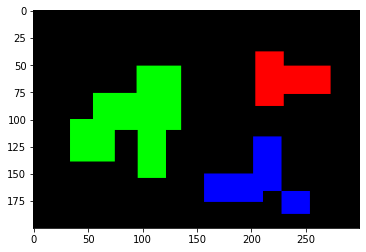

In [37]:
plt.imshow(colored)

## Q.60. アルファブレンド

In [38]:
imori_orig = imori_img.copy().astype(np.float32)
thorino_orig = thorino_img.copy().astype(np.float32)

alpha = 0.6
result = imori_orig * alpha + thorino_orig * (1.0 - alpha)

result = np.clip(result, 0, 255).astype(np.uint8)

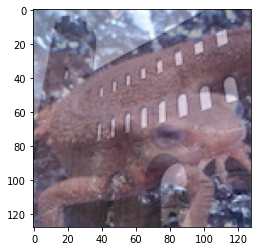

In [39]:
plt.imshow(result)